<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px" width="50" height="50">

# Intro to Pandas II

---

## Learning Objectives

- **Handle** null and missing values.
- **Aggregate** data using groupby.
- **Join** DataFrames in Pandas.

## Lesson Guide

- [Review Exercises](#review)
    - [Review Exercise 1: DataFrame & Series](#exercise-one)  
    - [Review Exercise 2: Filtering & Sorting](#exercise-two)
    
- [Renaming, Adding, and Removing Columns](#columns)
    - [Handling Missing Values](#missing-values)
    - [Exercise 3: Columns & Missing Values](#exercise-three)
    
- [Split-Apply-Combine](#split-apply-combine)
    - [Exercise 4: Groupby](#exercise-four)
    
    
- [Selecting Multiple Columns and Filtering Rows](#multiple-columns)
- [Joining (Merging) DataFrames](#joining-dataframes)
- [OPTIONAL: Other Commonly Used Features](#other-features)
- [OPTIONAL: Other Less Used Features of Pandas](#uncommon-features)
- [Summary](#summary)

<a id="review"></a>
# Review Exercises

<a id="exercise-one"></a>
### Exercise 1: DataFrame & Series

In [1]:
# Read drinks.csv into a DataFrame called "drinks".

In [2]:
# Print the head and the tail.

In [3]:
# Examine the default index, datatypes, and shape.

In [4]:
# Print the beer_servings Series.

In [5]:
# Calculate the average beer_servings for the entire data set.

In [6]:
# Count the number of occurrences of each "continent" value and see if it looks correct.

<a id="exercise-two"></a>
### Exercise 2: Filtering & Sorting
Use the `drinks.csv` or `drinks` `DataFrame` from earlier to complete the following.

In [7]:
# View the DataFrame

In [8]:
# Filter DataFrame to only include European countries.

In [9]:
# Filter DataFrame to only include European countries with wine_servings > 300.

In [10]:
# Calculate the average beer_servings for all of Europe.


In [11]:
# Determine which 10 countries have the highest total_litres_of_pure_alcohol.

<a id="columns"></a>
### Renaming, Adding, and Removing Columns

- **Objective:** Manipulate `DataFrame` columns.

In [84]:
# Replace all column names using a list of matching length.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent'] 

# Replace during file reading (disables the header from the file).
drinks = pd.read_csv('datasets/drinks.csv', header=0, names=drink_cols)

In [85]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


**Easy Column Operations**<br>
Rather than having to reference indexes and create for loops to do column-wise operations, Pandas is smart and knows that when we add columns together we want to add the values in each row together.

In [87]:
# Add a new column as a function of existing columns.
drinks['servings'] = drinks.beer + drinks.spirit + drinks.wine
drinks['mL'] = drinks.liters * 1000

drinks.head()

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0


**Removing Columns**

In [88]:
# axis=0 for rows, 1 for columns
drinks.drop('mL', axis=1).head()

,country,beer,spirit,wine,liters,continent,servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319


In [89]:
# Drop multiple columns.
drinks.drop(['mL', 'servings'], axis=1)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [90]:
# Drop on the original DataFrame rather than returning a new one.
drinks.drop(['mL', 'servings'], axis=1, inplace=True)

In [91]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


<a id="missing-values"></a>
### Handling Missing Values

- **Objective:** Know how to handle null and missing values.

Sometimes, values will be missing from the source data or as a byproduct of manipulations. It is very important to detect missing data. Missing data can:

- Make the entire row ineligible to be training data for a model.
- Hint at data-collection errors.
- Indicate improper conversion or manipulation.
- Actually not be missing — it sometimes means "zero," "false," "not applicable," or "entered an empty string."

For example, a `.csv` file might have a missing value in some data fields:

```
tool_name,material,cost
hammer,wood,8
chainsaw,,
wrench,metal,5
```

When this data is imported, "null" values will be stored in the second row (in the "material" and "cost" columns).

> In Pandas, a "null" value is either `None` or `np.NaN` (Not a Number). Many fixed-size numeric datatypes (such as integers) do not have a way of representing `np.NaN`. So, numeric columns will be promoted to floating-point datatypes that do support it. For example, when importing the `.csv` file above:

> - **For the second row:** `None` will be stored in the "material" column and `np.NaN` will be stored in the "cost" column. The entire "cost" column (stored as a single `ndarray`) must be stored as floating-point values to accommodate the `np.NaN`, even though an integer `8` is in the first row.

In [93]:
np.NaN

nan

In [94]:
np.nan

nan

In [95]:
3 + np.nan

nan

In [96]:
np.nan * np.inf

nan

In [97]:
np.mean([3, 4, 1, 3, np.nan])

nan

In [98]:
pd.Series([3, 4, 1, 4, 2, np.nan]).mean()

2.8

In [99]:
bool(np.nan)

True

In [100]:
bool(None)

False

In [101]:
# Missing values are usually excluded in calculations by default.
drinks.continent.value_counts()              # Excludes missing values in the calculation

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [102]:
# Includes missing values
drinks.continent.value_counts(dropna=False)

AF     53
EU     45
AS     44
NaN    23
OC     16
SA     12
Name: continent, dtype: int64

In [103]:
# Find missing values in a Series.
# True if missing, False if not missing
drinks.continent.isnull().head()

0    False
1    False
2    False
3    False
4    False
Name: continent, dtype: bool

In [104]:
# Count the missing values — sum() works because True is 1 and False is 0.
drinks.continent.isnull().mean()

0.11917098445595854

In [105]:
# True if not missing, False if missing
drinks.continent.notnull()

0       True
1       True
2       True
3       True
4       True
5      False
6       True
7       True
8       True
9       True
10      True
11     False
12      True
13      True
14     False
15      True
16      True
17     False
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
163     True
164     True
165     True
166     True
167     True
168     True
169     True
170     True
171     True
172     True
173     True
174    False
175     True
176     True
177     True
178     True
179     True
180     True
181     True
182     True
183     True
184    False
185     True
186     True
187     True
188     True
189     True
190     True
191     True
192     True
Name: continent, Length: 193, dtype: bool

In [106]:
# Only show rows where continent is not missing.
drinks[drinks.continent.isnull()]

,country,beer,spirit,wine,liters,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


**Understanding Pandas Axis**

In [107]:
# Sums "down" the 0 axis (rows) — so, we get the sums of each column
drinks.sum(axis=0)

country    AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer                                                   20489
spirit                                                 15632
wine                                                    9544
liters                                                 910.4
dtype: object

In [108]:
# axis=0 is the default.
drinks.sum()

country    AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer                                                   20489
spirit                                                 15632
wine                                                    9544
liters                                                 910.4
dtype: object

In [109]:
# Sums "across" the 1 axis (columns) — so, we get the sums of numeric values in the row (beer+spirit+wine+liters+…)
drinks.sum(axis=1)

0        0.0
1      279.9
2       39.7
3      707.4
4      324.9
5      279.9
6      447.3
7      214.8
8      555.4
9      554.7
10      73.3
11     355.3
12     114.0
13       0.0
14     358.3
15     571.4
16     601.5
17     391.8
18      52.1
19      23.4
20     219.8
21     261.6
22     248.4
23     413.2
24      34.6
25     587.3
26      43.3
27      94.3
28      49.0
29     220.0
       ...  
163    318.6
164     98.7
165    405.2
166    575.2
167     57.0
168     17.3
169    364.4
170    222.9
171      6.1
172     58.3
173     63.1
174    366.4
175     75.3
176     81.4
177    124.2
178     57.0
179     62.3
180    496.9
181    158.8
182    550.4
183     48.7
184    499.7
185    376.6
186    136.4
187     50.9
188    443.7
189    116.0
190      6.1
191     57.5
192     90.7
Length: 193, dtype: float64

**Find missing values in a `DataFrame`.**

In [110]:
# DataFrame of Booleans
drinks.isnull()

,country,beer,spirit,wine,liters,continent
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,True
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [111]:
# Count the missing values in each column — remember by default, axis=0.
drinks.isnull().mean()

country      0.000000
beer         0.000000
spirit       0.000000
wine         0.000000
liters       0.000000
continent    0.119171
dtype: float64

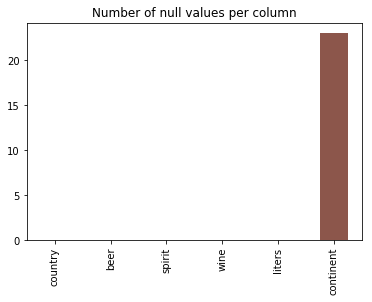

In [112]:
drinks.isnull().sum().plot(kind='bar');         # visually
plt.title('Number of null values per column');

**Dropping Missing Values**

In [113]:
# Drop a row if ANY values are missing from any column — can be dangerous!
print(drinks.shape)
print(drinks.dropna().shape)

(193, 6)
(170, 6)


In [114]:
# Drop a row only if ALL values are missing.
print(drinks.shape)
print(drinks.dropna(how='all').shape)

(193, 6)
(193, 6)


**Filling Missing Values**<br>
You may have noticed that the continent North America (NA) does not appear in the `continent` column. Pandas read in the original data and saw "NA", thought it was a missing value, and converted it to a `NaN`, missing value.

In [115]:
# Fill in missing values with "NA" — this is dangerous to do without manually verifying them!
print(drinks.continent.value_counts())
print('')
print(drinks.continent.fillna(value='NA').value_counts())

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64


In [116]:
# Modifies "drinks" in-place
drinks.continent.fillna(value='NA', inplace=True)

In [117]:
# Turn off the missing value filter — this is a better approach!
drinks = pd.read_csv('datasets/drinks.csv', header=0, names=drink_cols, na_filter=False)
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

<a id="exercise-three"></a>
### Exercise 3: Columns & Missing Values

In [118]:
# Read ufo.csv into a DataFrame called "ufo".
ufo_data = 'datasets/ufo.csv'
ufo = pd.read_csv(ufo_data)

In [119]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [12]:
# Check the shape of the DataFrame.

In [13]:
# What are the three most common colors reported?

In [14]:
# Rename any columns with spaces so that they don't contain spaces.

In [15]:
# For reports in VA, what's the most common city?

In [16]:
# Print a DataFrame containing only reports from Arlington, VA.

In [17]:
# Count the number of missing values in each column.

In [18]:
# How many rows remain if you drop all rows with any missing values?

<a id="split-apply-combine"></a>
### Split-Apply-Combine

Split-apply-combine is a pattern for analyzing data. Suppose we want to find mean beer consumption per country. Then:

- **Split:** We group data by continent.
- **Apply:** For each group, we apply the `mean()` function to find the average beer consumption.
- **Combine:** We now combine the continent names with the `mean()`s to produce a summary of our findings.

In [131]:
# For each continent, calculate the mean beer servings.
drinks.groupby('continent').beer.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
NA    145.434783
OC     89.687500
SA    175.083333
Name: beer, dtype: float64

In [132]:
# For each continent, calculate the mean of all numeric columns.
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [133]:
# For each continent, describe beer servings.
drinks.groupby('continent').beer.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
AS,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
EU,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
NA,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
OC,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
SA,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


In [134]:
# Similar, but outputs a DataFrame and can be customized — "agg" allows you to aggregate results of Series functions
# drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max', 'median'])
drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max']).sort_values('mean')

,count,mean,min,max
continent,,,,
AS,44,37.045455,0,247
AF,53,61.471698,0,376
OC,16,89.687500,0,306
NA,23,145.434783,1,285
SA,12,175.083333,93,333
EU,45,193.777778,0,361


In [135]:
def mean_trim(x):
    return np.mean(x[x != 0])

def count_nonzero(x):
    return len(x[x != 0])

In [136]:
drinks.groupby('continent')['beer'].agg(['count', 'mean', count_nonzero, mean_trim])

,count,mean,count_nonzero,mean_trim
continent,,,,
AF,53,61.471698,50,65.160000
AS,44,37.045455,36,45.277778
EU,45,193.777778,43,202.790698
NA,23,145.434783,23,145.434783
OC,16,89.687500,14,102.500000
SA,12,175.083333,12,175.083333


In [137]:
# For each continent, describe all numeric columns.
drinks_grp = drinks.groupby('continent').describe()
drinks.groupby('continent').describe()

beer                                                             \
          count        mean        std   min     25%    50%     75%    max   
continent                                                                    
AF         53.0   61.471698  80.557816   0.0   15.00   32.0   76.00  376.0   
AS         44.0   37.045455  49.469725   0.0    4.25   17.5   60.50  247.0   
EU         45.0  193.777778  99.631569   0.0  127.00  219.0  270.00  361.0   
NA         23.0  145.434783  79.621163   1.0   80.00  143.0  198.00  285.0   
OC         16.0   89.687500  96.641412   0.0   21.00   52.5  125.75  306.0   
SA         12.0  175.083333  65.242845  93.0  129.50  162.5  198.00  333.0   

          liters            ...    spirit         wine                         \
           count      mean  ...       75%    max count        mean        std   
continent                   ...                                                 
AF          53.0  3.007547  ...     19.00  152.0  53.0   16.264151  38.846419   
AS          44.0  2.170455  ...     98.00  326.0  44.0    9.068182  21.667034   
EU          45.0  8.617778  ...    173.00  373.0  45.0  142.222222  97.421738   
NA          23.0  5.995652  ...    190.50  438.0  23.0   24.521739  28.266378   
OC          16.0  3.381250  ...     65.25  254.0  16.0   35.625000  64.555790   
SA          12.0  6.308333  ...    148.75  302.0  12.0   62.416667  88.620189   

                                            
           min   25%    50%     75%    max  
continent                                   
AF         0.0   1.0    2.0   13.00  233.0  
AS         0.0   0.0    1.0    8.00  123.0  
EU         0.0  59.0  128.0  195.00  370.0  
NA         1.0   5.0   11.0   34.00  100.0  
OC         0.0   1.0    8.5   23.25  212.0  
SA         1.0   3.0   12.0   98.50  221.0  

[6 rows x 32 columns]

In [138]:
drinks_grp['liters']['mean']['NA']

5.995652173913043

In [139]:
# For each continent, count the number of rows.
print(drinks.groupby('continent').continent.count())
print('')
print(drinks.continent.value_counts())   # should be the same

continent
AF    53
AS    44
EU    45
NA    23
OC    16
SA    12
Name: continent, dtype: int64

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64


<a id="exercise-four"></a>
### Exercise 4: Groupby

Use the "users" `DataFrame` or "users" file in the Data folder to complete the following.

In [141]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [142]:
# For each occupation in "users", count the number of occurrences.
users['occupation'].value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
doctor             7
homemaker          7
Name: occupation, dtype: int64

In [144]:
users.groupby('occupation')['occupation'].count()

occupation
administrator     79
artist            28
doctor             7
educator          95
engineer          67
entertainment     18
executive         32
healthcare        16
homemaker          7
lawyer            12
librarian         51
marketing         26
none               9
other            105
programmer        66
retired           14
salesman          12
scientist         31
student          196
technician        27
writer            45
Name: occupation, dtype: int64

In [145]:
# For each occupation, calculate the mean age.
users.groupby("occupation")["age"].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [147]:
users.loc[users['occupation'] == 'librarian', :].head()

,user_id,age,gender,occupation,zip_code
18,19,40,M,librarian,02138
26,27,40,F,librarian,30030
42,43,29,F,librarian,20854
55,56,25,M,librarian,46260
87,88,49,F,librarian,11701


In [148]:
# For each occupation, calculate the minimum and maximum ages.
users.groupby('occupation')['age'].agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [149]:
# For each combination of occupation and gender, calculate the mean age.
users.groupby(['occupation', 'gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

----

<a id="multiple-columns"></a>
### Selecting Multiple Columns and Filtering Rows

In [150]:
ufo.rename(columns={
    'city': 'City',
    'state': 'State'
}, inplace=True)

In [179]:
# Select multiple columns — yet another overload of the DataFrame indexing operator!
my_cols = ['City', 'State']     # Create a list of column names...
ufo[my_cols].head()                    # ...and use that list to select columns.

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


In [180]:
# Or, combine into a single step (this is a Python list inside of the Python index operator!).
ufo[   ['City', 'State']   ].head()

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


**Use `loc` to select columns by name.**

In [182]:
# "loc" locates the values from the first parameter (colon means "all rows"), and the column "City".
ufo.loc[:, 'City'].head() 

0                  Ithaca
1             Willingboro
2                 Holyoke
3                 Abilene
4    New York Worlds Fair
Name: City, dtype: object

In [183]:
# Select two columns.
ufo.loc[:, ['City', 'State']].head()

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


In [184]:
# Select a range of columns — unlike Python ranges, Pandas index ranges INCLUDE the final column in the range.
ufo.loc[:, 'City':'State'].head()

,City,colors,shape,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY


In [185]:
# "loc" can also filter rows by "name" (the index).
# Row 0, all columns
ufo.loc[0, :]

City              Ithaca
colors               NaN
shape           TRIANGLE
State                 NY
time      6/1/1930 22:00
Name: 0, dtype: object

In [186]:
# Rows 0/1/2, all columns
ufo.loc[0:2, :]

,City,colors,shape,State,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [187]:
# Rows 0/1/2, range of columns
ufo.loc[0:2, 'City':'State'] 

,City,colors,shape,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [188]:
ufo.loc[ufo['City'] == 'Towaco', 'City':'State']

,City,colors,shape,State
1585,Towaco,NaN,CIRCLE,NJ
45630,Towaco,NaN,TRIANGLE,NJ
71134,Towaco,NaN,OVAL,NJ


In [151]:
# Use "iloc" to filter rows and select columns by integer position.
# (Remember that rows/columns use indices, so "iloc" lets you refer to indices via their index rather than value!)
# All rows, columns in position 0 and 3 (City/State)
ufo.iloc[:, [0, 3]]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
5,Valley City,ND
6,Crater Lake,CA
7,Alma,MI
8,Eklutna,AK
9,Hubbard,OR


In [153]:
# All rows, columns in position 0/1/2/3
# Note here it is NOT INCLUDING 4 because this is an integer range, not a Pandas index range!
ufo.iloc[:, 0:4].head()

,City,colors,shape,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY


In [154]:
# Rows in position 0/1/2, all columns
ufo.iloc[:3, :] 

,City,colors,shape,State,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


<a id="joining-dataframes"></a>
### Joining (Merging) `DataFrames`

In [155]:
import pandas as pd
movie_cols = ['movie_id', 'title']
movies_filename = 'datasets/movies.tbl'

movies = pd.read_table(movies_filename, sep='|', header=None, names=movie_cols, usecols=[0, 1], encoding='latin1')
movies.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [156]:
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_filename = 'datasets/movie_ratings.tsv'

ratings = pd.read_table(ratings_filename, sep='\t', header=None, names=rating_cols)
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [157]:
# Merge "movies" and "ratings" (inner join on "movie_id").
movie_ratings = pd.merge(movies, ratings)
movie_ratings.head()

,movie_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [158]:
print(movies.shape)
print(ratings.shape)
print(movie_ratings.shape)

(1682, 2)
(100000, 4)
(100000, 5)


<a id="other-features"></a>
### OPTIONAL: Other Commonly Used Features

In [159]:
def quad(x):
    return 4*x

In [160]:
def do_thing(f, x):
    return f(x)

In [162]:
do_thing(quad, 8)

32

In [164]:
do_thing(lambda x: 4*x, 8)

32

In [165]:
def adder(x):
    return lambda y: x + y

In [166]:
add3 = adder(3)

In [168]:
add3(5)

8

In [169]:
adder(3)(5)

8

In [171]:
# Apply an arbitrary function to each value of a Pandas column, storing the result in a new column.
#users['under30'] = users.age.apply(lambda age: age < 30)
users.age.apply(lambda age: age < 30).head()

0     True
1    False
2     True
3     True
4    False
Name: age, dtype: bool

In [173]:
(users['age'] < 30).head()

0     True
1    False
2     True
3     True
4    False
Name: age, dtype: bool

In [174]:
# Apply an arbitrary function to each row of a DataFrame, storing the result in a new column.
#  (Remember that, by default, axis=0. Since we want to go row by row, we set axis=1.)
users['under30male'] = users.apply(lambda row: row.age < 30 and row.gender == 'M', axis=1)

In [175]:
users.head()

,user_id,age,gender,occupation,zip_code,under30male
0,1,24,M,technician,85711,True
1,2,53,F,other,94043,False
2,3,23,M,writer,32067,True
3,4,24,M,technician,43537,True
4,5,33,F,other,15213,False


In [176]:
# Map existing values to a different set of values.
users['is_male'] = users.gender.map({'F':0, 'M':1})

In [177]:
users.head()

,user_id,age,gender,occupation,zip_code,under30male,is_male
0,1,24,M,technician,85711,True,1
1,2,53,F,other,94043,False,0
2,3,23,M,writer,32067,True,1
3,4,24,M,technician,43537,True,1
4,5,33,F,other,15213,False,0


In [ ]:
# Replace all instances of a value in a column (must match entire value).
ufo.State.replace('Fl', 'FL', inplace=True)

In [ ]:
# String methods are accessed via "str".
ufo.State.str.upper()                               # Converts to upper case
# checks for a substring
ufo['Colors Reported'].str.contains('RED', na='False') 

In [178]:
# Convert a string to the datetime format (this is often slow — consider doing it in the "read_csv()" method.)
ufo['time'] = pd.to_datetime(ufo.time)
print(ufo.time.dt.hour.head())          # Datetime format exposes convenient attributes
(ufo.time.max() - ufo.time.min()).days  # Also allows you to do datetime "math"

0    22
1    20
2    14
3    13
4    19
Name: time, dtype: int64


30776

In [179]:
ufo.head()

,City,colors,shape,State,time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [ ]:
# Set and then remove an index.
ufo.set_index('Time', inplace=True)
ufo.reset_index(inplace=True)

In [ ]:
# Change the datatype of a column.
drinks['beer'] = drinks.beer.astype('float')

In [ ]:
# Create dummy variables for "continent" and exclude first dummy column.
continent_dummies = pd.get_dummies(drinks.continent, prefix='cont')#.iloc[:, 1:]

In [ ]:
continent_dummies.head()

In [ ]:
# Concatenate two DataFrames (axis=0 for rows, axis=1 for columns).
drinks = pd.concat([drinks, continent_dummies], axis=1)

<a id="uncommon-features"></a>
### OPTIONAL: Other Less-Used Features of Pandas

In [ ]:
# Detecting duplicate rows
users.duplicated()          # True if a row is identical to a previous row
users.duplicated().sum()    # Count of duplicates
users[users.duplicated()]   # Only show duplicates
users.drop_duplicates()     # Drop duplicate rows
users.age.duplicated()      # Check a single column for duplicates
users.duplicated(['age', 'gender', 'zip_code']).sum()   # Specify columns for finding duplicates

In [182]:
# Convert a range of values into descriptive groups.
drinks['beer_level'] = 'low'    # Initially set all values to "low"
drinks.loc[drinks.beer.between(101, 200), 'beer_level'] = 'med'     # Change 101-200 to "med"
drinks.loc[drinks.beer.between(201, np.inf), 'beer_level'] = 'high'    # Change 201-400 to "high"

In [185]:
# Display a cross-tabulation of two Series.
pd.crosstab(drinks.continent, drinks.beer_level)

beer_level,low,med,high
continent,,,
AF,45,4,4
AS,40,3,1
EU,9,12,24
NA,8,10,5
OC,11,2,3
SA,1,8,3


In [184]:
# Convert "beer_level" into the "category" datatype.
drinks['beer_level'] = pd.Categorical(drinks.beer_level, categories=['low', 'med', 'high'])
drinks.sort_values('beer_level')   # Sorts by the categorical ordering (low to high)

,country,beer,spirit,wine,liters,continent,beer_level
0,Afghanistan,0,0,0,0.0,AS,low
102,Malaysia,13,4,0,0.3,AS,low
103,Maldives,0,0,0,0.0,AS,low
104,Mali,5,1,1,0.6,AF,low
106,Marshall Islands,0,0,0,0.0,OC,low
107,Mauritania,0,0,0,0.0,AF,low
108,Mauritius,98,31,18,2.6,AF,low
101,Malawi,8,11,1,1.5,AF,low
110,Micronesia,62,50,18,2.3,OC,low
112,Mongolia,77,189,8,4.9,AS,low


In [ ]:
# Limit which rows are read when reading in a file — useful for large files!
pd.read_csv('datasets/drinks.csv', nrows=10)           # Only read first 10 rows
pd.read_csv('datasets/drinks.csv', skiprows=[1, 2])    # Skip the first two rows of data

In [189]:
drinks.to_csv("MYCOOLDATA.csv", index=False)

In [190]:
cool_data = pd.read_csv("MYCOOLDATA.csv")

In [191]:
cool_data.head()

,country,beer,spirit,wine,liters,continent,beer_level
0,Afghanistan,0,0,0,0.0,AS,low
1,Albania,89,132,54,4.9,EU,low
2,Algeria,25,0,14,0.7,AF,low
3,Andorra,245,138,312,12.4,EU,high
4,Angola,217,57,45,5.9,AF,high


In [ ]:
# Write a DataFrame out to a .csv
drinks.to_csv('drinks_updated.csv')                 # Index is used as first column
drinks.to_csv('drinks_updated.csv', index=False)    # Ignore index

In [ ]:
# Create a DataFrame from a dictionary.
pd.DataFrame({'capital':['Montgomery', 'Juneau', 'Phoenix'], 'state':['AL', 'AK', 'AZ']})

In [ ]:
# Create a DataFrame from a list of lists.
pd.DataFrame([['Montgomery', 'AL'], ['Juneau', 'AK'], ['Phoenix', 'AZ']], columns=['capital', 'state'])

In [ ]:
# Randomly sample a DataFrame.
import NumPy as np
mask = np.random.rand(len(drinks)) < 0.66   # Create a Series of Booleans
train = drinks[mask]                        # Will contain around 66% of the rows
test = drinks[~mask]                        # Will contain the remaining rows

In [ ]:
# Change the maximum number of rows and columns printed ('None' means unlimited).
pd.set_option('max_rows', None)     # Default is 60 rows
pd.set_option('max_columns', None)  # Default is 20 columns
print(drinks)

In [ ]:
# Reset options to defaults.
pd.reset_option('max_rows')
pd.reset_option('max_columns')

In [ ]:
# Change the options temporarily (settings are restored when you exit the "with" block).
with pd.option_context('max_rows', None, 'max_columns', None):
    print(drinks)

<a id="summary"></a>
### Summary

Believe it or not, we've only barely touched the surface of everything that Pandas offers. Don't worry if you don't remember most of it — for now, just knowing what exists is key. Remember that the more you use Pandas to manipulate data, the more of these functions you will take interest in, look up, and remember.

In this notebook, the most important things to familiarize yourself with are the basics:
- Manipulating `DataFrames` and `Series`
- Filtering columns and rows
- Handling missing values
- Split-apply-combine (this one takes some practice!)